# Problem Statement
The goal is to build a model using logistic regression that could predict weather the salary is >50K or <=50K.

In [88]:
import pandas as pd

In [89]:
df= pd.read_csv('income.csv')

# Data Overview

In [90]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [91]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [92]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [93]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [94]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [95]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [96]:
df.race.value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [97]:
df.income.value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [98]:
df.duplicated().sum()

52

# Pre-processing Data¶
In the dataset, the columns "education" and "educational-num" provide similar information, with one indicating the highest education level attained and the other specifying the number of years of education. Therefore, we are removing the "educational-num" column. Likewise, the columns "marital-status" and "relationship" convey largely overlapping information, so we are deleting the "relationship" column in this case.

In [99]:
df= df.drop(['educational-num', 'relationship'], axis = 1)

Deleting duplicates

In [100]:
df= df.drop_duplicates().reset_index(drop = True) 

Data Preprocessing

In [101]:
df_workc= pd.get_dummies(df.workclass, dtype=int).add_prefix('workclass_')
df= pd.concat([df, df_workc], axis=1)
df= df.drop('workclass', axis= 1)

In [102]:
df_edu= pd.get_dummies(df.education, dtype=int).add_prefix('education_')
df= pd.concat([df, df_edu], axis=1)
df= df.drop('education', axis= 1)

In [103]:
df_marital_status= pd.get_dummies(df['marital-status'], dtype=int).add_prefix('marital-status_')
df= pd.concat([df, df_marital_status], axis=1)
df= df.drop('marital-status', axis= 1)

In [104]:
df_occ= pd.get_dummies(df.occupation, dtype=int).add_prefix('occupation_')
df= pd.concat([df, df_occ], axis=1)
df= df.drop('occupation', axis= 1)

In [105]:
df_race= pd.get_dummies(df.race, dtype=int).add_prefix('race_')
df= pd.concat([df, df_race], axis=1)
df= df.drop('race', axis= 1)

In [106]:
df_gender= pd.get_dummies(df.gender, dtype=int)
df= pd.concat([df, df_gender], axis=1)
df= df.drop('gender', axis= 1)

In [107]:
df_native_country= pd.get_dummies(df['native-country'], dtype=int)
df= pd.concat([df, df_native_country], axis=1)
df= df.drop('native-country', axis= 1)

In [108]:
df['income']= df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [109]:
df = df.drop('fnlwgt', axis=1)

Exploratory Data Analysis

In [110]:
df.columns.values

array(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'income',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_?',
       'occupation_Adm

Drop columns with low correlation to income

In [111]:
correlations= df.corr()['income'].abs()
sorted_correlations= correlations.sort_values()
n_droped_col= int(0.8 * len(df.columns))
cols_to_drop= sorted_correlations.iloc[:n_droped_col].index
df_droped= df.drop(cols_to_drop, axis= 1)

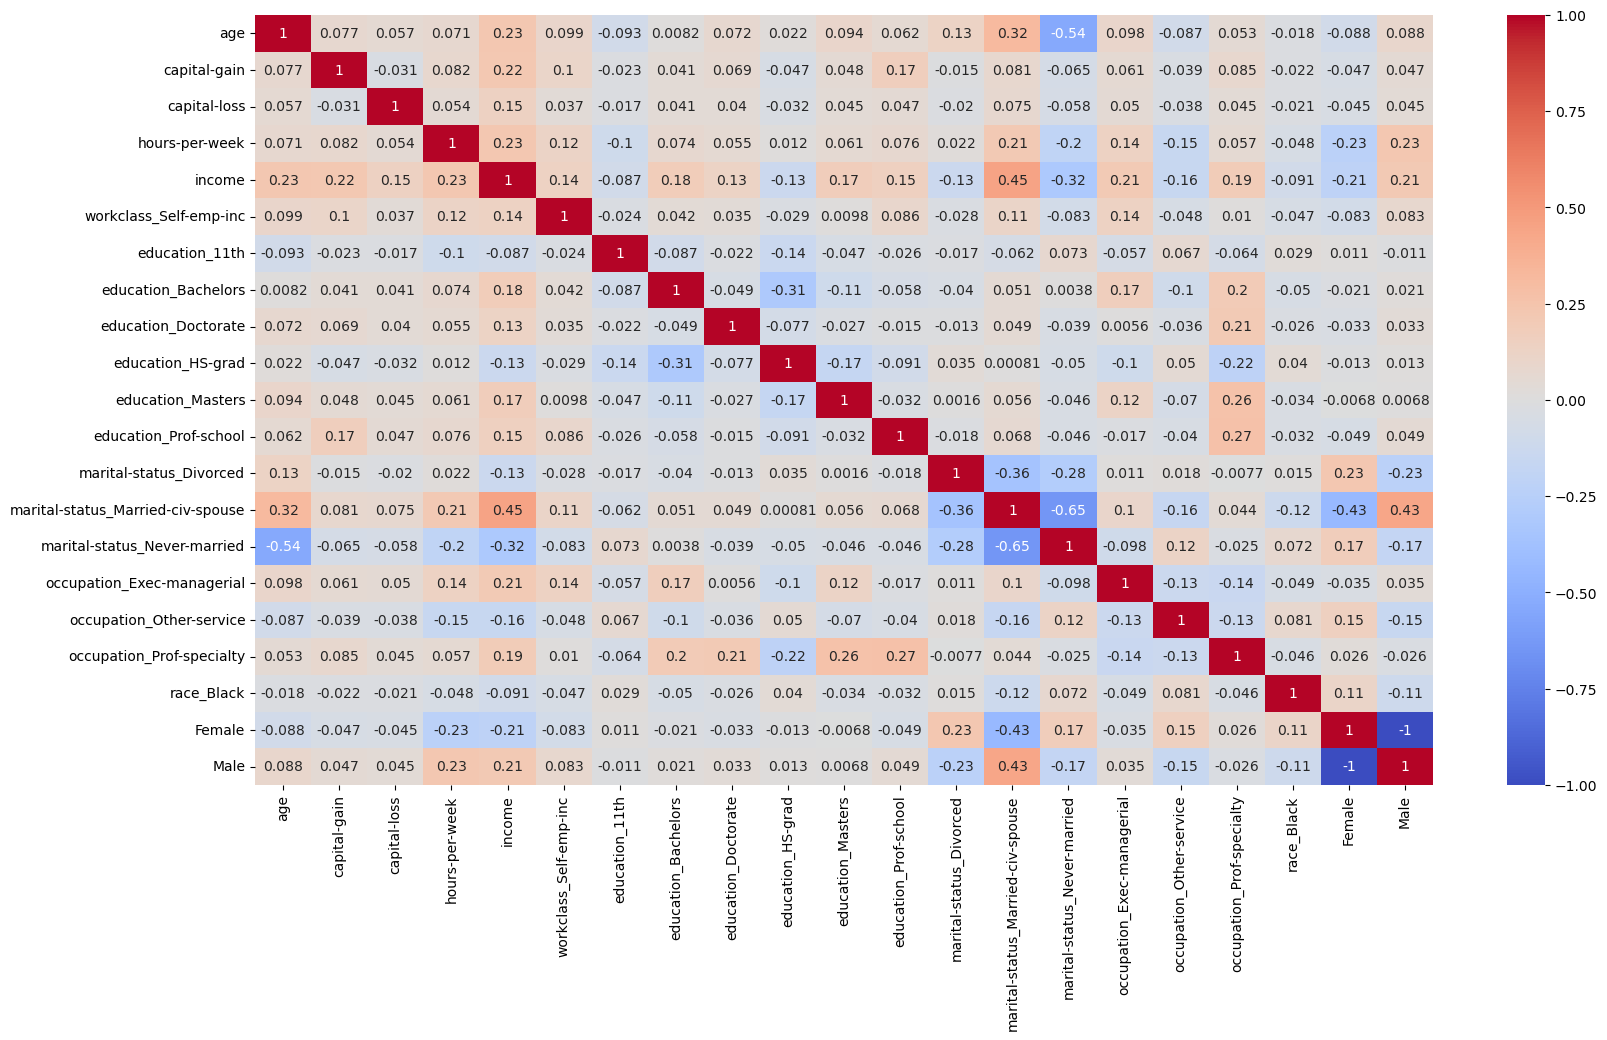

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19, 10))
sns.heatmap(df_droped.corr(), annot=True, cmap='coolwarm')

plt.show()

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [114]:
train_df, test_df= train_test_split(df, test_size=0.2)

In [115]:
train_x= train_df.drop('income', axis=1)
train_y= train_df['income']
test_x= test_df.drop('income', axis=1)
test_y= test_df['income']

In [116]:
forest= RandomForestClassifier()

forest.fit(train_x, train_y)

RandomForestClassifier()

In [117]:
train_score= forest.score(train_x, train_y)
test_score= forest.score(test_x, test_y)
print(f'training Accuracy={train_score:.3f}')
print(f'testing Accuracy={test_score:.3f}')

training Accuracy=0.974
testing Accuracy=0.839


In [118]:
forest.feature_importances_

array([2.40690799e-01, 1.17799514e-01, 3.89377050e-02, 1.18655992e-01,
       1.75398315e-03, 5.68208732e-03, 6.41850896e-03, 3.43899695e-07,
       1.11805494e-02, 6.60685889e-03, 9.53595771e-03, 5.05536325e-03,
       1.30334077e-04, 3.10194885e-03, 3.93810252e-03, 1.50087391e-03,
       6.40343105e-04, 1.51247367e-03, 4.20910340e-03, 2.65066678e-03,
       4.81735429e-03, 5.26761219e-03, 2.13813022e-02, 6.54675212e-03,
       1.30997169e-02, 1.56884077e-02, 1.19886556e-04, 8.75938151e-03,
       9.11605997e-03, 1.15310886e-02, 4.23647414e-04, 1.02376861e-01,
       1.34905616e-03, 3.86558254e-02, 2.73653872e-03, 2.42765825e-03,
       2.08080539e-03, 5.48295317e-03, 1.05362016e-04, 6.65257541e-03,
       2.32892660e-02, 4.40791223e-03, 3.41993852e-03, 4.64961673e-03,
       8.01411796e-03, 2.51135038e-04, 2.40204479e-02, 3.01776117e-03,
       6.95559909e-03, 5.32797359e-03, 4.50732012e-03, 1.43770388e-03,
       3.20177999e-03, 5.09057210e-03, 1.05529824e-03, 6.76047036e-03,
      

In [119]:
forest.feature_names_in_

array(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical'

In [120]:
importances= dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances= {k: v for k, v in sorted(importances.items(), key=lambda x:x[1], reverse=True)}

In [121]:
importances

{'age': 0.2406907993184373,
 'hours-per-week': 0.11865599202776332,
 'capital-gain': 0.1177995140907019,
 'marital-status_Married-civ-spouse': 0.10237686113471627,
 'capital-loss': 0.038937705011558334,
 'marital-status_Never-married': 0.038655825401623996,
 'occupation_Prof-specialty': 0.024020447854383824,
 'occupation_Exec-managerial': 0.023289266017814954,
 'education_Bachelors': 0.02138130223311832,
 'education_Masters': 0.015688407743279918,
 'Male': 0.014363895226107893,
 'education_HS-grad': 0.013099716856429968,
 'Female': 0.012501387545031417,
 'marital-status_Divorced': 0.01153108861797601,
 'workclass_Private': 0.01118054935812353,
 'workclass_Self-emp-not-inc': 0.009535957711565698,
 'education_Some-college': 0.009116059972593772,
 'education_Prof-school': 0.008759381509877859,
 'occupation_Other-service': 0.008014117955722492,
 'occupation_Sales': 0.006955599088146929,
 'United-States': 0.006919694885755751,
 'race_White': 0.006760470361598398,
 'occupation_Craft-repair':

In [122]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    'n_estimators': [50,100,200],
    'max_depth': [5,10,30,None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt','log2']
}

grid_search=GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=param_grid, verbose=10)

In [123]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.824 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.828 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.818 total time=   0.6s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.826 total time=   0.5s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.7s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.7s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.801 total time=   1.7s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.801 total time=   1.6s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.794 total time=   1.5s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.855 total time=   0.8s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.862 total time=   0.8s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.858 total time=   0.8s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.856 total time=   1.8s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.857 total time=   1.8s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200;, score=0.847 total time=   2.6s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200;, score=0.848 total time=   2.8s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200;, score=0.848 total time=   3.6s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200;, score=0.848 total time=   2.8s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200;, score=0.848 total time=   2.5s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.859 total time=   2.1s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.857 total time=   2.1s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.856 total time=   4.2s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.861 total time=   4.2s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.858 total time=   4.6s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.848 total time=  15.9s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.848 total time=  16.4s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.851 total time=  12.3s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.848 total time=  11.5s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.852 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.851 total time=   2.5s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.850 total time=   4.6s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.851 total time=   4.8s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.853 total time=   4.8s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.852 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=10)

In [169]:
forest= grid_search.best_estimator_
forest

RandomForestClassifier(max_depth=30, min_samples_split=4)

In [126]:
print(f'Training Accuracy after tuning: {forest.score(train_x, train_y):.3f}')
print(f'Testing Accuracy after tuning: {forest.score(test_x, test_y):.3f}')

Training Accuracy after tuning: 0.932
Testing Accuracy after tuning: 0.855


In [ ]:
importances_2= dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances_2= {k: v for k, v in sorted(importances_2.items(), key=lambda x:x[1], reverse=True)}
importances_2

In [172]:
# get features of a person and adjust them later
person_features= df.iloc[200].tolist()
print("person features:", row_values)

person features: [51, 0, 0, 40, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [174]:
# Define the feature values for a person and predict his income
features_name = ['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'Female', 'Male', '?', 'Cambodia',
       'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
       'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece',
       'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong',
       'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico',
       'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago',
       'United-States', 'Vietnam', 'Yugoslavia']

# new sample
person = [40, 0, 0, 45, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

df_person = pd.DataFrame([person], columns=features_name)

pred = forest.predict(df_person)

if pred== 0:
    print("Estimated income :<=50K")
else:
    print("Estimated income :>50K")
        

Estimated income :<=50K
